In [1]:
#Assignment2
#Student name:Jinghui Lu
#Student number:15203181

import csv
import tweepy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Set cusumer_key,cusumer_secret,access_token,token_secret and invoke the API. You can get those from twitter https://dev.twitter.com/

In [2]:
#set your own key here
consumer_key='7kgMozaX7lAvZiqFCUHnjmstJ' 
consumer_secret='phkhiAzyVMctR4MjFxfYgu0953EvbpTlpxdyFuznQJLO98G28c'
access_token ='3577184776-zD6ecZZlD7eY1MyemeaN9r3y0PuPvp9mHO0og6w'
access_token_secret ='CuaoMdSDfuEKpqWJ8CSqiFmRlC8DHUaPrIVErp5kFRjCb'

#get the authorization 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth) 

In this part, I Invoke the API to get the data from twitter, this data is including recent English twitters which mentioned **"deep learning"** or **"alphago"**. I parse 4 attrbutes: **author, create time, text,ID** and store them in **CSV** files. Cause the API limit, you can only get part of all recent data at one time, so I did several times to parse the data. As time changed, the data you get by this code should be different from mine. So you don't need to get data again just use data I provided in the zip file to do the test. I comment the repeat parts, if you want to run these codes, you can uncommment them.

In [ ]:
#Open/Create a file to append data
csvFile = open('alphago2.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search, 
                    q="alphago", 
                    lang="en").items():
#Write a row to the csv file/ I use encode utf-8
    csvWriter.writerow([tweet.id,tweet.author.screen_name.encode('utf-8'),
                        tweet.created_at, tweet.text.encode('utf-8')])
csvFile.close()

In [ ]:
# # Open/Create a file to append data
# csvFile = open('deeplearning1.csv', 'a')
# #Use csv Writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search, 
#                     q="deep learning",
#                     lang="en").items():
# #Write a row to the csv file/ I use encode utf-8
#     csvWriter.writerow([tweet.id,tweet.author.screen_name.encode('utf-8'),
#                         tweet.created_at, tweet.text.encode('utf-8')])
# csvFile.close()

In [ ]:
# # Open/Create a file to append data
# csvFile = open('deeplearning2.csv', 'a')
# #Use csv Writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search, 
#                     q="deep learning",
#                     since_id=717318983200993000,
#                     max_id=718508858298109000,
#                     lang="en").items():
# #Write a row to the csv file/ I use encode utf-8
#     csvWriter.writerow([tweet.id,tweet.author.screen_name.encode('utf-8'),
#                         tweet.created_at, tweet.text.encode('utf-8')])
# csvFile.close()

In [ ]:
# # Open/Create a file to append data
# csvFile = open('deeplearning3.csv', 'a')
# #Use csv Writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search, 
#                     q="deep learning",
#                     since_id=717318983200993000,
#                     max_id=718110305478291000,
#                     lang="en").items():
# #Write a row to the csv file/ I use encode utf-8
#     csvWriter.writerow([tweet.id,tweet.author.screen_name.encode('utf-8'),
#                         tweet.created_at, tweet.text.encode('utf-8')])
# #     print (tweet.author.screen_name,tweet.created_at, tweet.text)
# csvFile.close()

In [ ]:
# Open/Create a file to append data
# csvFile = open('deeplearning4.csv', 'a')
# #Use csv Writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search, 
#                     q="deep learning",
#                     since_id=717318983200993000,
#                     max_id=717835243323936000,
#                     lang="en").items():
# #Write a row to the csv file/ I use encode utf-8
#     csvWriter.writerow([tweet.id,tweet.author.screen_name.encode('utf-8'),
#                         tweet.created_at, tweet.text.encode('utf-8')])
# csvFile.close()

In [ ]:
# #Open/Create a file to append data
# csvFile = open('deeplearning5.csv', 'a')
# #Use csv Writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search, 
#                     q="deep learning",
#                     since_id=717318983200993000,
#                     max_id=717602134917791000,
#                     lang="en").items():
# #Write a row to the csv file/ I use encode utf-8
#     csvWriter.writerow([tweet.id,tweet.author.screen_name.encode('utf-8'),
#                         tweet.created_at, tweet.text.encode('utf-8')])
# #     print (tweet.author.screen_name,tweet.created_at, tweet.text)
# csvFile.close()

In this part I **load data** from CSV file and do some manipulation to the data to get the final datasets which used for analysis.
First I load data and combine them.

In [3]:
#set the header for the data
header_row=['ID','author','time','text']
ag = pd.read_csv("alphago1.csv", skiprows=[0,1,2,3], names=header_row)
dl1 = pd.read_csv("deeplearning1.csv", skiprows=[0,1,2,3], names=header_row)
dl2 = pd.read_csv("deeplearning2.csv", skiprows=[0,1,2,3], names=header_row)
dl3 = pd.read_csv("deeplearning3.csv", skiprows=[0,1,2,3], names=header_row)
dl4 = pd.read_csv("deeplearning4.csv", skiprows=[0,1,2,3], names=header_row)
dl5 = pd.read_csv("deeplearning5.csv", skiprows=[0,1,2,3], names=header_row)

#the data of deeplearning should be appended into one dataset
dl=dl1.append(dl2).append(dl3).append(dl4).append(dl5)

#copy the datasets for different visualizations and summarizations
ag1=ag.copy()
dl1=dl.copy()

OSError: File b'alphago1.csv' does not exist

Check the datasets.

In [4]:
print(ag)

                ID              author           time  \
0     7.190000e+17         b'AI_Today'  4/10/16 19:09   
1     7.190000e+17  b'ArtificialOther'  4/10/16 18:57   
2     7.190000e+17       b'Matt_Kiser'  4/10/16 18:50   
3     7.190000e+17      b'AlphaGoWins'  4/10/16 18:45   
4     7.190000e+17      b'DockerSeuss'  4/10/16 18:35   
5     7.190000e+17         b't_chusri'  4/10/16 18:21   
6     7.190000e+17        b'luisbebop'  4/10/16 18:21   
7     7.190000e+17      b'AlphaGoWins'  4/10/16 18:15   
8     7.190000e+17             b'sdbo'  4/10/16 18:09   
9     7.190000e+17      b'swannodette'  4/10/16 17:58   
10    7.190000e+17     b'AlibabaDaily'  4/10/16 17:49   
11    7.190000e+17          b'Annan26'  4/10/16 17:47   
12    7.190000e+17      b'AlphaGoWins'  4/10/16 17:45   
13    7.190000e+17        b'LordBexar'  4/10/16 17:43   
14    7.190000e+17       b'prahalghai'  4/10/16 17:31   
15    7.190000e+17      b'AlphaGoWins'  4/10/16 17:15   
16    7.190000e+17         b'ra

In [5]:
print(dl)

               ID              author           time  \
0    7.192480e+17        b'angelcv01'  4/10/16 19:36   
1    7.192480e+17          b'ASC2112'  4/10/16 19:36   
2    7.192480e+17     b'bigirwenkyaj'  4/10/16 19:36   
3    7.192480e+17      b'sissypaulaq'  4/10/16 19:36   
4    7.192470e+17        b'GuiLevass'  4/10/16 19:34   
5    7.192470e+17  b'eugene_agafonov'  4/10/16 19:32   
6    7.192470e+17  b'OpenMarketingTV'  4/10/16 19:32   
7    7.192460e+17       b'iamlindner'  4/10/16 19:29   
8    7.192460e+17      b'ChaohaiDing'  4/10/16 19:27   
9    7.192450e+17      b'thenewstack'  4/10/16 19:25   
10   7.192450e+17         b'R2Drones'  4/10/16 19:24   
11   7.192450e+17      b'GlaciarBlue'  4/10/16 19:23   
12   7.192440e+17     b'Kobayashi_H_'  4/10/16 19:23   
13   7.192440e+17    b'itknowingness'  4/10/16 19:22   
14   7.192440e+17          b'2Groupe'  4/10/16 19:22   
15   7.192430e+17  b'baillybailliere'  4/10/16 19:19   
16   7.192430e+17       b'sachinghai'  4/10/16 1

Secondly, I add a tag to both dataset to distinguish them. Cause ID column does no contribute to our analysis, so I remove it.

In [6]:
#add tag to datasets
ag1['Alphago']=1
dl1['DeepLearning']=1

ag['tag']='Alphago'
dl['tag']='DeepLearning'

In [7]:
#delete ID column
del ag['ID']
del dl['ID']
del ag1['ID']
del dl1['ID']

Clean the data, remove some useless characters from data, such as "b'" in datasets.

In [8]:
#select string from a centain range to remove the useless characters
ag['author'] = ag['author'].map(lambda x: str(x)[2:-1])
ag['text'] = ag['text'].map(lambda x: str(x)[2:-1])

dl['author'] = dl['author'].map(lambda x: str(x)[2:-1])
dl['text'] = dl['text'].map(lambda x: str(x)[2:-1])

ag1['author'] = ag1['author'].map(lambda x: str(x)[2:-1])
ag1['text'] = ag1['text'].map(lambda x: str(x)[2:-1])

dl1['author'] = dl1['author'].map(lambda x: str(x)[2:-1])
dl1['text'] = dl1['text'].map(lambda x: str(x)[2:-1])

Improve data by add a column 'data', so that we could abstract data in a higher hierarchy.

In [9]:
#function to create a new column based on value of old column
def f(row):
    if row['time'][0:4] == '4/10':
        val = '04/10'
    elif row['time'][0:4] == '4/7':
        val = '04/07'
    elif row['time'][0:4] == '4/8/':
        val = '04/08'
    elif row['time'][0:4] == '4/9/':
        val = '04/09'
    else:
        val = '04/06'
    return val

#add column "date"
ag['date']=ag.apply(f,axis=1)
dl['date']=dl.apply(f,axis=1)

ag1['date']=ag1.apply(f,axis=1)
dl1['date']=dl1.apply(f,axis=1)

#combine two datasets together
result=ag.append(dl)
result1=ag1.append(dl1)

Check whether it has some empty data.

In [10]:
ag.isnull().sum()

author    0
time      0
text      0
tag       0
date      0
dtype: int64

In [11]:
dl.isnull().sum()

author    0
time      0
text      0
tag       0
date      0
dtype: int64

In [12]:
result.isnull().sum()

author    0
time      0
text      0
tag       0
date      0
dtype: int64

In [13]:
result1.isnull().sum()

Alphago         13132
DeepLearning     1253
author              0
date                0
text                0
time                0
dtype: int64

Fill the dataset and **output** the clean data to **CSV** files.

In [22]:
#fill the blank
result2=result1.fillna(0)

#output the data to csv file
ag.to_csv("alphago_clean.csv")
dl.to_csv("deeplearning_clean.csv")
result2.to_csv("clean_data.csv")

Do some describe and summarization

In [15]:
#abstract the data by "tag"
grouprs=result.groupby("tag")
grouprs.describe()

author   date  \
tag                                       
Alphago      count          1253   1253   
             unique          858      4   
             top     AlphaGoWins  04/06   
             freq            213    595   
DeepLearning count         13132  13132   
             unique         7263      4   
             top       nschaetti  04/06   
             freq            420   8919   

                                                                  text  \
tag                                                                      
Alphago      count                                                1253   
             unique                                               1006   
             top     RT @NYTScience: The Go champion that lost to G...   
             freq                                                   25   
DeepLearning count                                               13132   
             unique                                               7623   
             top     RT @TechCrunch: Nvidia announces a supercomput...   
             freq                                                  240   

                             time  
tag                                
Alphago      count           1253  
             unique          1093  
             top     4/8/16 15:10  
             freq               5  
DeepLearning count          13132  
             unique          4410  
             top     4/7/16 15:17  
             freq             137

In [16]:
#abstract data by "date"
grouprs1=result.groupby("date")
grouprs1.describe()

author           tag  \
date                                    
04/06 count        9514          9514   
      unique       5281             2   
      top     nschaetti  DeepLearning   
      freq          154          8919   
04/08 count        2171          2171   
      unique       1714             2   
      top     nschaetti  DeepLearning   
      freq           68          1919   
04/09 count        1390          1390   
      unique       1024             2   
      top     nschaetti  DeepLearning   
      freq           96          1176   
04/10 count        1310          1310   
      unique        929             2   
      top     nschaetti  DeepLearning   
      freq          113          1118   

                                                           text          time  
date                                                                           
04/06 count                                                9514          9514  
      unique                                               5343          2211  
      top     RT @TechCrunch: Nvidia announces a supercomput...  4/7/16 15:17  
      freq                                                  239           137  
04/08 count                                                2171          2171  
      unique                                               1632          1020  
      top     RT @googleresearch: The Google Brain team is f...  4/8/16 22:47  
      freq                                                   99            38  
04/09 count                                                1390          1390  
      unique                                               1040           776  
      top     RT @troykelly: .@_aylien launches News API by ...   4/9/16 0:00  
      freq                                                   52            41  
04/10 count                                                1310          1310  
      unique                                                872           690  
      top     RT @Forbes: Nvidia CEO plans to redouble focus...  4/10/16 8:17  
      freq                                                   54            15

In [17]:
#abstract data by both "date" and "tag"
grouprs2=result.groupby(['date','tag'])
grouprs2.describe()

author  \
date  tag                                
04/06 Alphago      count           595   
                   unique          458   
                   top     AlphaGoWins   
                   freq             83   
      DeepLearning count          8919   
                   unique         4911   
                   top       nschaetti   
                   freq            151   
04/08 Alphago      count           252   
                   unique          182   
                   top     AlphaGoWins   
                   freq             45   
      DeepLearning count          1919   
                   unique         1556   
                   top       nschaetti   
                   freq             66   
04/09 Alphago      count           214   
                   unique          148   
                   top     AlphaGoWins   
                   freq             47   
      DeepLearning count          1176   
                   unique          885   
                   top       nschaetti   
                   freq             96   
04/10 Alphago      count           192   
                   unique          142   
                   top     AlphaGoWins   
                   freq             38   
      DeepLearning count          1118   
                   unique          807   
                   top       nschaetti   
                   freq            107   

                                                                        text  \
date  tag                                                                      
04/06 Alphago      count                                                 595   
                   unique                                                486   
                   top     RT @kdnuggets: #AlphaGo is just the first step...   
                   freq                                                   11   
      DeepLearning count                                                8919   
                   unique                                               4866   
                   top     RT @TechCrunch: Nvidia announces a supercomput...   
                   freq                                                  239   
04/08 Alphago      count                                                 252   
                   unique                                                235   
                   top     RT @tunguz: What AlphaGo\xe2\x80\x99s Victory ...   
                   freq                                                    3   
      DeepLearning count                                                1919   
                   unique                                               1399   
                   top     RT @googleresearch: The Google Brain team is f...   
                   freq                                                   99   
04/09 Alphago      count                                                 214   
                   unique                                                175   
                   top     RT @NYTScience: The Go champion that lost to G...   
                   freq                                                   12   
      DeepLearning count                                                1176   
                   unique                                                867   
                   top     RT @troykelly: .@_aylien launches News API by ...   
                   freq                                                   52   
04/10 Alphago      count                                                 192   
                   unique                                                149   
                   top     RT @NYTScience: The Go champion that lost to G...   
                   freq                                                   25   
      DeepLearning count                                                1118   
                   unique                                                733   
                   top     RT @Forbes: Nvid

In this part I will do some **visualizations** to explore the data.
First we are looking the number of two topic's tweets.

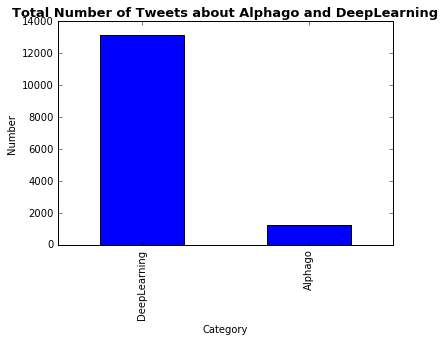

In [18]:
#visualize the number by bar chart
number = result['tag'].value_counts()
plt.xlabel("Category")
plt.ylabel("Number")
plt.title('Total Number of Tweets about Alphago and DeepLearning', fontsize=13, fontweight='bold')
p=number.plot(kind="bar")

#save as png
fig = p.get_figure()
fig.savefig("tweets_bars.png")

We can find tweets about Deep Learning is much more than Alphago's.
Then can also use pie chart to see which date has the most tweets.

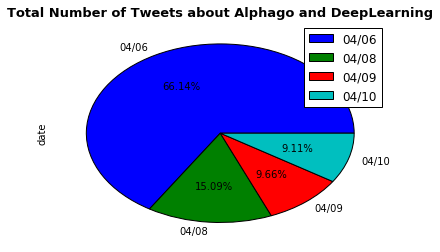

In [19]:
#visualize the number by bar chart
number = result['date'].value_counts()
plt.title('Total Number of Tweets about Alphago and DeepLearning', fontsize=13, fontweight='bold')
p=number.plot(kind="pie",legend='best',autopct='%.2f%%')

#save as png
fig = p.get_figure()
fig.savefig("tweets_pies.png")

We could find out that 06/04 has the largest tweets post.
However, the number can't tell anything, we should look the change of number of twitters about two topics by **time series.**
We should use line chart to reflect the trends of tweets post.

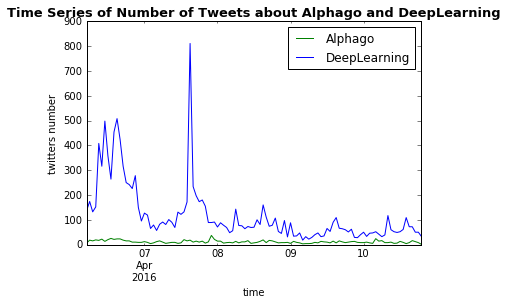

In [20]:
#set the "time" column as index
result1['time']=pd.to_datetime(pd.Series(result1['time']))
result1.index = result1['time']

#reassemble the data as time series, interval is 1 hour
time = pd.DataFrame(result1.resample('1h', how='count'))

#visual the data as line chart to see the change of two topic's twitters
plt.ylabel('twitters number')
plt.title('Time Series of Number of Tweets about Alphago and DeepLearning', fontsize=13, fontweight='bold')
p=time.Alphago.plot(color='g')
p=time.DeepLearning.plot(color='b')
plt.legend(loc='best')

#save as png
fig = p.get_figure()
fig.savefig("tweets_trend.png")

Because the tweets about Deep Learning is much more than Alphago, we can't see the trends of alphago clearly.
So we should do some **normalization** here.

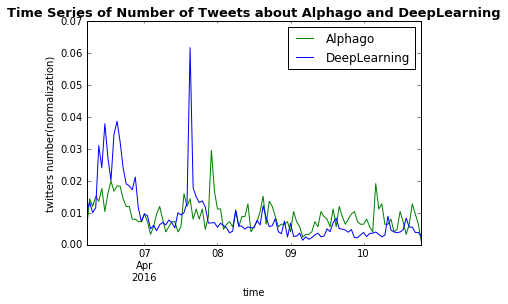

In [21]:
#normalize the data by value/sum
time['Alphago']=time['Alphago']/time['Alphago'].sum()
time['DeepLearning']=time['DeepLearning']/time['DeepLearning'].sum()

#visualize again
plt.ylabel('twitters number(normalization)')
plt.title('Time Series of Number of Tweets about Alphago and DeepLearning', fontsize=13, fontweight='bold')
p=time.Alphago.plot(color='g')
p=time.DeepLearning.plot(color='b')
plt.legend(loc='best')

#save as png
fig = p.get_figure()
fig.savefig("tweets_trend_normalization.png")

Now, the tendency is clear, we can find out the post number of Deep Learning and Alphago has dramatical **synchronization**, namely, though has a little lag, when line of DeepLearning climbs to peaks, so does Alphago and when line of DeepLearning goes down, the same situation will happen in line of Alphago.

It may reflect there are some postive corelaiton in two datasets, it means a tweet about DeepLearning has a high possibility to mention Alphago too.  